<a href="https://colab.research.google.com/github/DianaH00H/Analisis-ecofem/blob/main/Copia_de_Farmaciel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Actividad: Farmaciel**
#### ¡Empresa farmacéutica Farmaciel está contratando!

Maciel, nuestro CEO, quiere saber cuál sería el salario que se ofrecerá a las personas que apliquen a una vacante dependiendo de varias de sus características, por ejemplo, su escolaridad o años de experiencia.

A01612830 Yoseba Michel Mireles Ahumada

A01638976 Jose Alfredo Lopez Torres

A01638960 Augusto Ley Rodriguez

A01639515 Diana Laura Hernández Almeida

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Fase 3

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
file_path = "/content/salary.csv"
df = pd.read_csv(file_path)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [ ]:
df=df.drop(columns=["Gender", "Race", "Country"])
df.head()

,Age,Education Level,Job Title,Years of Experience,Salary,Senior
0,32.0,1,Software Engineer,5.0,90000.0,0
1,28.0,2,Data Analyst,3.0,65000.0,0
2,45.0,3,Manager,15.0,150000.0,1
3,36.0,1,Sales Associate,7.0,60000.0,0
4,52.0,2,Director,20.0,200000.0,0


In [ ]:
titulos = ["Software Engineer","Data Analyst", "Product Manager"]
df=df[df['Job Title'].isin(titulos)]

In [ ]:
df["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Product Manager'],
      dtype=object)

In [ ]:
titulos = ["Software Engineer","Product Manager", "Data Analyst"]
archivos = ["software_engineer.csv", "product_manager.csv", "data_analyst.csv"]

for i in range(len(titulos)):
    titulo = titulos[i]
    archivo = archivos[i]
    df1 = df[df["Job Title"] == titulo]
    df1.to_csv(file_path + archivo, index=False)

#Fase 4 y 5

In [ ]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#Data frames
df_se=pd.read_csv(file_path + 'software_engineer.csv')
df_pm=pd.read_csv(file_path + 'product_manager.csv')
df_da=pd.read_csv(file_path + 'data_analyst.csv')

###Software Engineer

In [ ]:
df_se=df_se.drop(columns=["Job Title"])
#Matriz de correlacion
correlation_matrix_se = df_se.corr()
print(correlation_matrix_se)

                          Age  Education Level  Years of Experience    Salary  \
Age                  1.000000         0.637487             0.956170  0.635212   
Education Level      0.637487         1.000000             0.556263  0.325381   
Years of Experience  0.956170         0.556263             1.000000  0.678980   
Salary               0.635212         0.325381             0.678980  1.000000   
Senior               0.794209         0.765232             0.734882  0.412082   

                       Senior  
Age                  0.794209  
Education Level      0.765232  
Years of Experience  0.734882  
Salary               0.412082  
Senior               1.000000  


MSE: 1270128828.3744771
R2: 0.46084719719539813


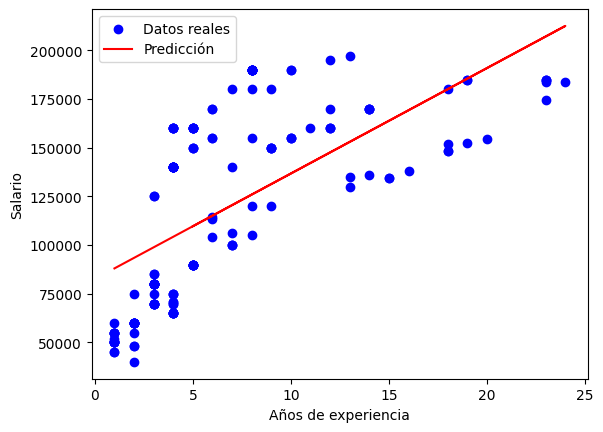

In [ ]:
#Regresion lineal simple

X = df_se[['Years of Experience']]  #Variable independiente
y = df_se['Salary']  #Variable dependiente

#Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo de regresion lineal
model = LinearRegression()

#Entrenar el modelo
model.fit(X_train, y_train)

#Predecir los valores
y_pred = model.predict(X_test)

#Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

# Graficar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

MSE (Polynomial): 920388967.3045413
R2 (Polynomial): 0.6093071188473402


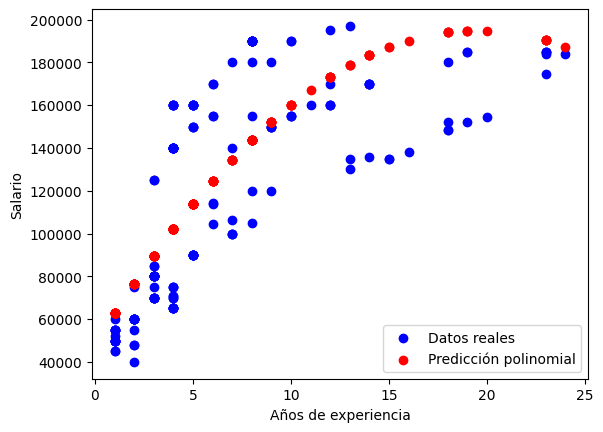

In [ ]:
#Regresion Polinomial grado 2

#Transformar las caracteristicas a polinomio de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#Conjuntos de entrenamiento y prueba
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

#Modelo de regresion lineal con características polinomiales
model_poly = LinearRegression()

#Entrenar el modelo
model_poly.fit(X_train_poly, y_train)

# Predecir los valores
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluar el modelo
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'MSE (Polynomial): {mse_poly}')
print(f'R2 (Polynomial): {r2_poly}')

# Graficar los resultados
plt.scatter(X_test['Years of Experience'], y_test, color='blue', label='Datos reales') # Access column using the name
plt.scatter(X_test['Years of Experience'], y_pred_poly, color='red', label='Predicción polinomial') #Access column using the name
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

###Manager

In [ ]:
df_pm=df_pm.drop(columns=["Job Title"])
#Matriz de correlacion
correlation_matrix_pm = df_pm.corr()
print(correlation_matrix_pm)

                          Age  Education Level  Years of Experience    Salary  \
Age                  1.000000         0.412880             0.918342  0.654096   
Education Level      0.412880         1.000000             0.511446  0.536604   
Years of Experience  0.918342         0.511446             1.000000  0.849138   
Salary               0.654096         0.536604             0.849138  1.000000   
Senior               0.159589        -0.087726             0.089625 -0.055053   

                       Senior  
Age                  0.159589  
Education Level     -0.087726  
Years of Experience  0.089625  
Salary              -0.055053  
Senior               1.000000  


MSE: 681527045.0790596
R2: 0.7252925889998205


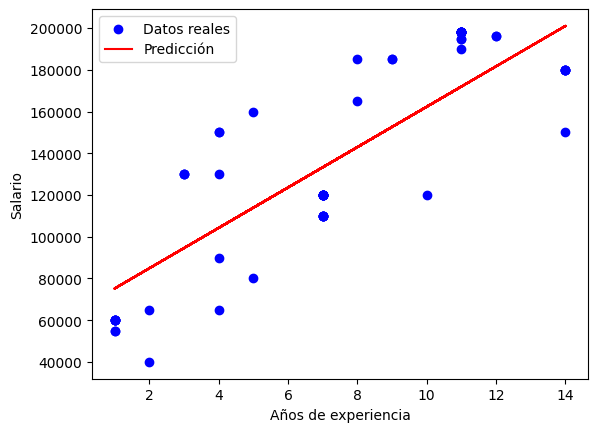

In [ ]:
#Regresion lineal simple

X = df_pm[['Years of Experience']]  #Variable independiente
y = df_pm['Salary']  #Variable dependiente

#Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo de regresion lineal
model = LinearRegression()

#Entrenar el modelo
model.fit(X_train, y_train)

#Predecir los valores
y_pred = model.predict(X_test)

#Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

# Graficar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

MSE (Polynomial): 641135993.726697
R2 (Polynomial): 0.7415732652029134


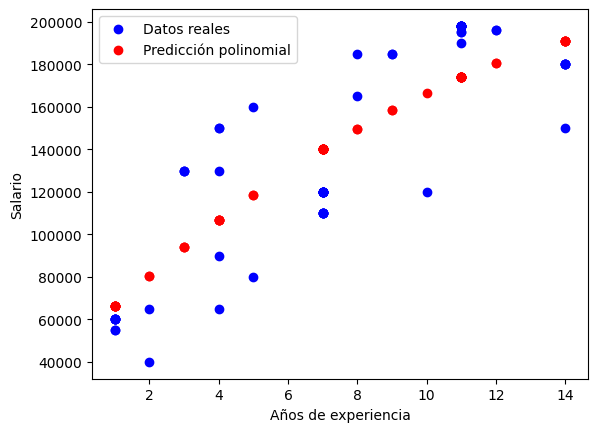

In [ ]:
#Regresion Polinomial grado 2

#Transformar las caracteristicas a polinomio de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#Conjuntos de entrenamiento y prueba
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

#Modelo de regresion lineal con características polinomiales
model_poly = LinearRegression()

#Entrenar el modelo
model_poly.fit(X_train_poly, y_train)

# Predecir los valores
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluar el modelo
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'MSE (Polynomial): {mse_poly}')
print(f'R2 (Polynomial): {r2_poly}')

# Graficar los resultados
plt.scatter(X_test['Years of Experience'], y_test, color='blue', label='Datos reales') # Access column using the name
plt.scatter(X_test['Years of Experience'], y_pred_poly, color='red', label='Predicción polinomial') #Access column using the name
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

###Data Analyst

In [ ]:
df_da=df_da.drop(columns=["Job Title"])
#Matriz de correlacion
correlation_matrix_da = df_da.corr()
print(correlation_matrix_da)

                          Age  Education Level  Years of Experience    Salary  \
Age                  1.000000         0.529496             0.951463  0.425580   
Education Level      0.529496         1.000000             0.403106 -0.135599   
Years of Experience  0.951463         0.403106             1.000000  0.625058   
Salary               0.425580        -0.135599             0.625058  1.000000   
Senior               0.333642         0.369938             0.319196  0.085324   

                       Senior  
Age                  0.333642  
Education Level      0.369938  
Years of Experience  0.319196  
Salary               0.085324  
Senior               1.000000  


MSE: 720036902.4884496
R2: 0.4717151697141233


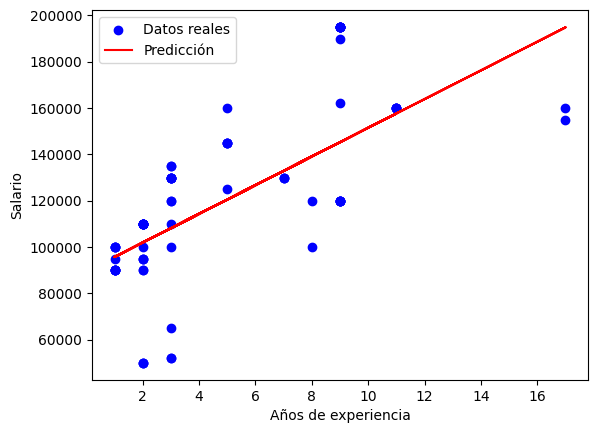

In [ ]:
#Regresion lineal simple

X = df_da[['Years of Experience']]  #Variable independiente
y = df_da['Salary']  #Variable dependiente

#Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modelo de regresion lineal
model = LinearRegression()

#Entrenar el modelo
model.fit(X_train, y_train)

#Predecir los valores
y_pred = model.predict(X_test)

#Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

# Graficar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicción')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

MSE (Polynomial): 668623997.4467508
R2 (Polynomial): 0.5094363722255368


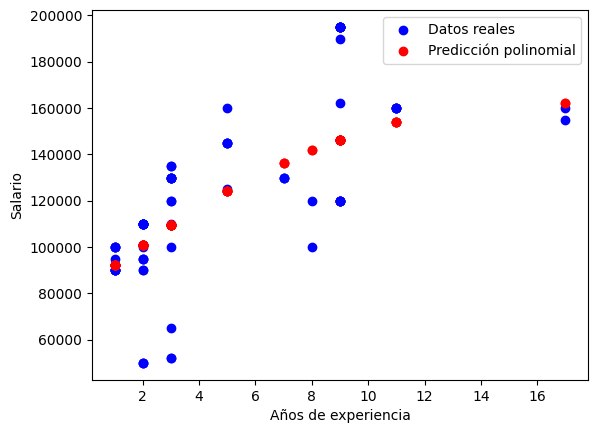

In [ ]:
#Regresion Polinomial grado 2

#Transformar las caracteristicas a polinomio de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#Conjuntos de entrenamiento y prueba
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

#Modelo de regresion lineal con características polinomiales
model_poly = LinearRegression()

#Entrenar el modelo
model_poly.fit(X_train_poly, y_train)

# Predecir los valores
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluar el modelo
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'MSE (Polynomial): {mse_poly}')
print(f'R2 (Polynomial): {r2_poly}')

# Graficar los resultados
plt.scatter(X_test['Years of Experience'], y_test, color='blue', label='Datos reales') # Access column using the name
plt.scatter(X_test['Years of Experience'], y_pred_poly, color='red', label='Predicción polinomial') #Access column using the name
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.legend()
plt.show()

En todos los casos encontramos que la mayor correlación con el salario fueron los años de experiencia, por lo que las regresiones las hicimos con dichas variables. En la regresión lineal simple entrenamos un modelo usando la libreria *sklearn*. Para el modelo polinomial transformamos la variable independiente en un polinomio de grado 2 y entrenamos un modelo con tales características.